# Revision de los datos originales

## EEG y python
La idea es ver como abrirlos y procesarlos bien para aplicar el algoritmo

Inicialmente tuve problemas para abrir los archivos de EEGlab pues pese a estar guardados en formato h5 como cualquier archivo mat, habia una suerte de diferencias e incompatibilidades.

Por suerte, EEGlab permite abrir los archivos utilizando OCTAVE sin problema y con `oct2py` fue posible abrirlo.

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave

EEGLAB_PATH = "~/repos/eeglab/" # aqui cloné la carpeta de eeglab

In [2]:
# Cargamos los modulos que requerimos de eeglab en oct2py
for funcs in ["guifunc", "popfunc", "adminfunc", "sigprocfunc", "miscfunc"]:
    octave.addpath(os.path.join(EEGLAB_PATH, "functions", funcs))

In [4]:
setfiles = glob("data/ClickCount/*.set")
setfiles.sort()
print(setfiles) #estos son todos los sujetos que se tenian

['data/ClickCount/Nr10_SR_Clicks_countevnt.set', 'data/ClickCount/Nr12_JV_Clicks_countevnt.set', 'data/ClickCount/Nr13_AP_Clicks_countevnt.set', 'data/ClickCount/Nr14_TS_Clicks_countevnt.set', 'data/ClickCount/Nr18_VS_Clicks_count.set', 'data/ClickCount/Nr19_MB_Clicks_count.set', 'data/ClickCount/Nr1PZClicks_countevnt.set', 'data/ClickCount/Nr20_RZ_Clicks_count.set', 'data/ClickCount/Nr21_VV_Clicks_count.set', 'data/ClickCount/Nr22_RR_clicks_count.set', 'data/ClickCount/Nr23_SS_Clicks_count.set', 'data/ClickCount/Nr24_PR_Clicks_count.set', 'data/ClickCount/Nr25_LA_clicks_count.set', 'data/ClickCount/Nr27_LG_Clicks_count.set', 'data/ClickCount/Nr28_MB_Clicks_count.set', 'data/ClickCount/Nr2_VS_Clicks_countevnt.set', 'data/ClickCount/Nr3_MS_clicks_countevnt.set', 'data/ClickCount/Nr6_VD_Clicks_countevnt.set', 'data/ClickCount/Nr7_TP_Clicks_countevnt.set', 'data/ClickCount/Nr8_RB_Clicks_countevnt.set', 'data/ClickCount/Nr9_MT_Clicks_countevnt.set', 'data/ClickCount/Nr_AP_Clicks_count.set'

vamos a abrir uno de estos archivos y ver los datos

In [5]:
eeg = octave.pop_loadset(setfiles[0]) #'data/ClickCount/Nr10_SR_Clicks_countevnt.set'
print (eeg.keys(), eeg.data.shape)

pop_loadset(): loading file data/ClickCount/Nr10_SR_Clicks_countevnt.set ...
Reading float file 'data/ClickCount/Nr10_SR_Clicks_countevnt.fdt'...
dict_keys(['setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'datfile', 'run']) (62, 1536, 108)


Como vemos, la estructura de los datos es de 62 canales, 1536 samples en 108 trials.

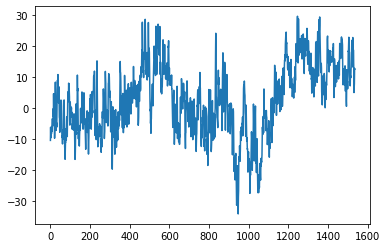

In [7]:
plt.plot(eeg.data[0,:,0]) # Plotear el canal 1 del primer trial

In [10]:
labels = np.array(eeg.chanlocs.labels)
print(labels)

[['Fp1' 'Fpz' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC5' 'FC1' 'FC2' 'FC6' 'T7'
  'C3' 'Cz' 'C4' 'T8' 'CP5' 'CP1' 'CP2' 'CP6' 'P7' 'P3' 'Pz' 'P4' 'P8'
  'POz' 'O1' 'Oz' 'O2' 'AF7' 'AF3' 'AF4' 'AF8' 'F5' 'F1' 'F2' 'F6' 'FC3'
  'FCz' 'FC4' 'C5' 'C1' 'C2' 'C6' 'CP3' 'CPz' 'CP4' 'P5' 'P1' 'P2' 'P6'
  'PO5' 'PO3' 'PO4' 'PO6' 'FT7' 'FT8' 'TP7' 'TP8' 'PO7' 'PO8']]


Tenemos ya cuales son los canales en la matriz, tenemos que entonces seleccionar los canales que son relevantes.

In [30]:
selected = np.array(["FC3", "FC1", "FCz", "FC2", "FC4",
                     "C3", "C1", "Cz", "C2", "C4",
                     "CP3", "CP1", "CPz", "CP2", "CP4"])
labels = labels.squeeze() #Dejarlo como un array 1d

# np.in1d entrega un bool de los puntos en a donde intersecta b.
# así obtenemos el indice de las señales
idx = np.in1d(labels, selected) 
print(idx)

[False False False False False False False False False  True  True False
 False  True  True  True False False  True  True False False False False
 False False False False False False False False False False False False
 False False  True  True  True False  True  True False  True  True  True
 False False False False False False False False False False False False
 False False]


In [31]:
selected = eeg.data[idx]
print(selected.shape)

(15, 1536, 108)


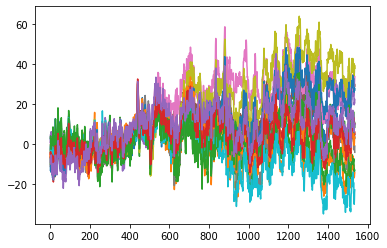

In [34]:
plt.plot(selected[:,:,0].T)
# TODO: hacer un grafico mas bonito que la indecencia que tengo aqui.

Con esto estaría casi listo el como acceder a los datos. Tenemos los canales, y perfectamente con un ciclo puedo acceder a los datos

(**_Si este mensaje existe aun, es porque aun no armo el bloque que sigue con el ciclo para abrir los archivos. Sorry for the lazyness_**)

In [ ]:
#Aqui el for con todo

## Parte 2: Implementar el ITPC en python

_pendiente hasta que profe Caro me envíe el código_

## Parte 3: Social Distancing estilo estadistico :v

La idea es teniendo los sujetos, encontrar que tan distantes estan entre si dentro de un espacio que represente cada trial.

* Ver como esto cambia aplicando el algoritmo propuesto en el paper, vs otros metodos de normalizacion
* Normalizar las señales
* Generar su ITPC
* Entrenar con el modelo de la Dani en modo leave-1-out